In [2]:
import numpy as np
class Autoencoder_with_cross_entropy_with_weight_tying_with_Nesterov_Momentum_with_relu_activation:
    def __init__(self,X,hidden_dim):
        self.input_dim = X.shape[0]
        self.hidden_dim = hidden_dim
        self.output_dim = X.shape[0]
        self.weights_input_hidden = np.random.randn(self.hidden_dim,self.input_dim)*np.sqrt(2/self.input_dim)
        
        # *np.sqrt(2/self.layer_sizes[i]))
        
        self.momentum_input_hidden=np.zeros((self.hidden_dim,self.input_dim))
        
        
        self.bias_input_hidden=np.zeros((self.hidden_dim,1))
        self.bias_hidden_output=np.zeros((self.output_dim,1))
        self.bias_hidden_output_momentum=np.zeros((self.output_dim,1))
        self.bias_input_hidden_momentum=np.zeros((self.hidden_dim,1))
        
    def sigmoid(self,z):
         
        z=np.clip(z, -500, 500)
        return 1/(1+np.exp(-z))
    
    def relu(self,z):
        return np.maximum(0,z)
    
    def relu_derivative(self,z):
        return np.where(z>0,1,0)
    
    def sigmoid_derivative(self,a):
        return a*(1-a)
    
    def lossfunction(self,a,X):
        
        eps = 1e-10
        return -np.mean(X*np.log(a + eps)+(1-X)*np.log(1-a + eps))

    
        
    def forward(self,X):
        
        z1=self.weights_input_hidden@X+self.bias_input_hidden
        a1=self.relu(z1)
        z2=self.weights_input_hidden.T@a1+self.bias_hidden_output
        a2=self.sigmoid(z2)
        
        return z1,a1,z2,a2
    
  
    def derivative_lossfunction(self,a,X):
        eps = 1e-10
        return -X/a+(1-X)/(1-a+eps)

    def backward(self,X,a2,z2,a1,z1):
        
        da2=self.derivative_lossfunction(a2,X)
        dz2=self.sigmoid_derivative(a2)*da2
        
        dw2=dz2@a1.T/self.input_dim
        
        db2=np.sum(dz2,axis=1,keepdims=True)/self.input_dim
        da1=self.weights_input_hidden@dz2
        dz1=self.relu_derivative(z1)*da1
         
        dw1=dz1@X.T/self.input_dim
        db1=np.sum(dz1,axis=1,keepdims=True)/self.input_dim
        
        
        return dw1,db1,dw2,db2
    
    
    def update_weights(self, learning_rate,momentum_rate,X,a2,z2,a1,z1):
        
        self.momentum_input_hidden = momentum_rate * self.momentum_input_hidden
        self.bias_input_hidden_momentum = momentum_rate * self.bias_input_hidden_momentum
        self.bias_hidden_output_momentum = momentum_rate * self.bias_hidden_output_momentum
        
        weights_input_hidden_new = self.weights_input_hidden 
        bias_input_hidden_new = self.bias_input_hidden 
        bias_hidden_output_new = self.bias_hidden_output 
        
        self.weights_input_hidden = self.weights_input_hidden-self.momentum_input_hidden
        self.bias_input_hidden = self.bias_input_hidden-self.bias_input_hidden_momentum
        self.bias_hidden_output = self.bias_hidden_output-self.bias_hidden_output_momentum
        
        dw1,db1,dw2,db2=self.backward(X,a2,z2,a1,z1)

        self.momentum_input_hidden +=  learning_rate * (dw1+dw2.T)
        self.bias_input_hidden_momentum += learning_rate * db1
        self.bias_hidden_output_momentum +=  learning_rate * db2
        
        self.weights_input_hidden = weights_input_hidden_new-self.momentum_input_hidden
        self.bias_input_hidden = bias_input_hidden_new-self.bias_input_hidden_momentum
        self.bias_hidden_output = bias_hidden_output_new-self.bias_hidden_output_momentum
        
        
        
        

       
        
        
        
        
        
    def train(self,X,epochs,learning_rate,momentum_rate):
        for i in range(epochs):
            z1,a1,z2,a2=self.forward(X)
            
            self.update_weights(learning_rate,momentum_rate,X,a2,z2,a1,z1)
            
            if i % 10 == 0:
                print(f"Epoch {i} loss: {self.lossfunction(a2,X)}")
                print(self.weights_input_hidden[:,5])
            
            
            
            
    def predict(self,X):
        z1,a1,z2,a2=self.forward(X)
        return a2


In [3]:
from sklearn.datasets import fetch_openml
import numpy as np

# Load MNIST
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.values / 255.0  # Normalize to [0,1]
X = X.T  # Now shape is (784, num_samples)


Epoch 0 loss: 0.6930299557120693
[-0.15608395 -0.28819267 -0.12340412 -0.0177944  -0.10936914 -0.03360501
 -0.01557892 -0.20517054 -0.07870206  0.01189854 -0.09869304 -0.3679804
 -0.10748488 -0.14325677 -0.15347865 -0.08498783  0.05744434 -0.05977463
 -0.04787248 -0.16508118 -0.05465453 -0.09992438 -0.11197226 -0.15827898
  0.02084652 -0.03056998 -0.05223196 -0.08091631 -0.00295335 -0.07700158
 -0.04087835 -0.07560022]
Epoch 10 loss: 0.4460597515305814
[-0.86390187 -2.28878737 -0.91329482 -0.08090948 -0.48949783 -0.53592739
 -0.29483889 -0.98681711 -0.89680936 -0.12691778 -0.44475002 -2.11377196
 -1.34925295 -0.43503194 -0.62991515 -0.49054051 -0.007043   -0.92812562
 -0.54036941 -1.0708111  -0.27667488 -0.81964872 -1.04155355 -1.2865586
 -0.31504852 -0.5348057  -0.26429852 -0.32104581 -0.20803763 -0.57374397
 -4.92462392 -0.21517751]
Epoch 20 loss: 0.3187737849197602
[-1.11070272 -2.98635161 -1.18871268 -0.10291635 -0.62204051 -0.71107637
 -0.39221082 -1.25936041 -1.18206574 -0.175320

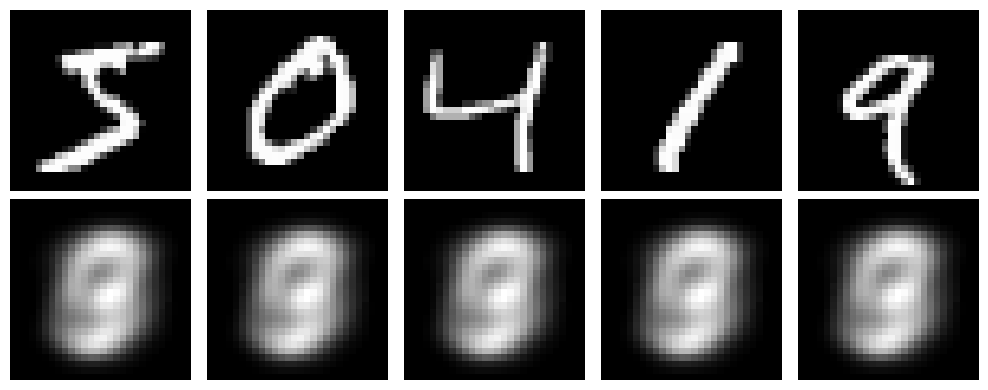

In [5]:

# Create and train the autoencoder with a unique name
autoencoder_with_nestorove_relu_momentum = Autoencoder_with_cross_entropy_with_weight_tying_with_Nesterov_Momentum_with_relu_activation(X, hidden_dim=32)

# Train the model
autoencoder_with_nestorove_relu_momentum.train(X, epochs=100, learning_rate=0.01, momentum_rate=0.9)

# Get reconstructions
reconstructions_with_nestorove_relu_momentum = autoencoder_with_nestorove_relu_momentum.predict(X)

# Plot some examples




In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
for i in range(5):
    # Original
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[:, i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    # Reconstructed
    plt.subplot(2, 5, i + 6)
    plt.imshow(reconstructions_with_nestorove_relu_momentum[:, i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

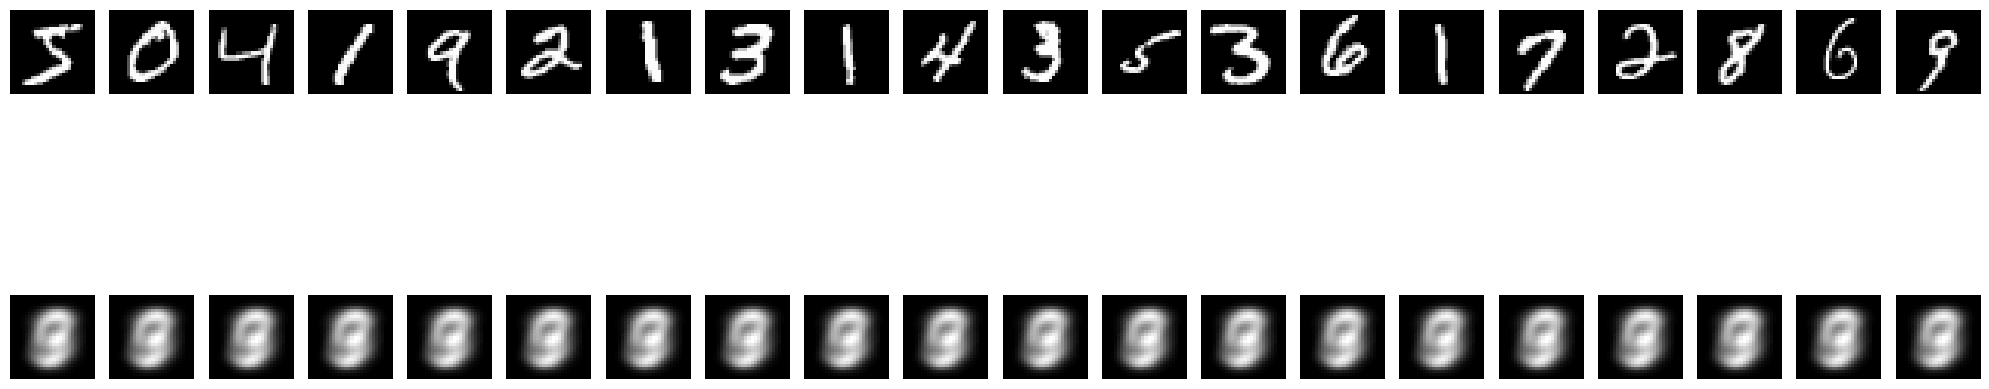

In [6]:
# Plot first 20 images
plt.figure(figsize=(20, 8))
for i in range(20):
    # Original
    plt.subplot(2, 20, i + 1)
    plt.imshow(X[:, i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    # Reconstructed
    plt.subplot(2, 20, i + 21)
    plt.imshow(reconstructions_with_nestorove_relu_momentum[:, i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()
